In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('driver_data.csv')
data.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [3]:
import sklearn.preprocessing as preprocessing
data_scaled = preprocessing.scale(data,axis=0)

In [4]:
import sklearn.cluster as cluster

In [6]:
kmeans = cluster.KMeans(n_clusters=3,init='k-means++')


In [7]:
kmeans=kmeans.fit(data_scaled)

In [8]:
from scipy.spatial.distance import cdist 

K= range(1,20)
wss= []

for k in K:
    kmeans= cluster.KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(data_scaled)
    wss.append(sum(np.min(cdist(data_scaled,
                                kmeans.cluster_centers_,
                               'euclidean'),axis=1))/data_scaled.shape[0])
    

Text(0.5, 1.0, 'Elbow Plot')

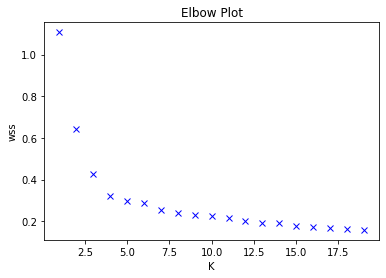

In [9]:
plt.plot(K,wss,'bx')      #'-' to get line type graph
plt.xlabel('K')
plt.ylabel('wss')
plt.title('Elbow Plot')

In [10]:
import sklearn.metrics as metrics

In [49]:
labels = cluster.KMeans(n_clusters=4, random_state=53).fit(data_scaled).labels_

In [50]:
metrics.silhouette_score(data_scaled,labels,
                        metric='euclidean',
                        sample_size=10000,random_state=264)

0.7843727073779273

In [51]:
for i in range(4,8):
    labels = cluster.KMeans(n_clusters=i, random_state=22).fit(data_scaled).labels_
    sil_score= metrics.silhouette_score(data_scaled,labels,metric='euclidean',
                            sample_size=10000,random_state=235)
    print('Silhouette Score for k = '+str(i)+' is '+str(sil_score))

Silhouette Score for k = 4 is 0.7843727073779273
Silhouette Score for k = 5 is 0.7341393562942123
Silhouette Score for k = 6 is 0.7339486206614896
Silhouette Score for k = 7 is 0.6722102963152072


In [70]:
kmeans= cluster.KMeans(n_clusters=4, random_state=223).fit(data_scaled)

In [71]:
def get_zprofile(data,kmeans):
    data['Labels']= kmeans.labels_
    profile= data.groupby('Labels').mean().subtract(
        data.drop('Labels',axis=1).mean(), axis =1)  ##X-Mean
    
    profile = profile.divide(data.drop('Labels',axis=1).std(),axis = 1)
    profile['Size']= data['Labels'].value_counts()
    #dividing by std 
    
    return profile

In [72]:
df1 = get_zprofile(data = data.copy(),kmeans = kmeans)
df1

,Distance_Feature,Speeding_Feature,Size
Labels,,,
0,-0.486723,-0.402447,2774
1,1.952388,-0.013970,695
2,1.903767,4.345280,104
3,-0.479463,1.578894,427


In [73]:
y_kmeans = kmeans.fit_predict(data_scaled)

In [74]:
X = pd.DataFrame(data_scaled,columns=data.columns)
X.head()

,Distance_Feature,Speeding_Feature
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744


In [75]:
y_kmeans = pd.Series(y_kmeans)

In [76]:
finaldf = pd.concat([X,y_kmeans],axis=1)
finaldf.head()

,Distance_Feature,Speeding_Feature,0
0,-0.089810,1.260613,3
1,-0.439773,1.041744,3
2,-0.215131,1.187656,3
3,-0.380666,0.822875,3
4,-0.401428,1.041744,3


In [77]:
finaldf.columns= ['Distance_Feature','Speeding_Feature','Label']
finaldf.head()

,Distance_Feature,Speeding_Feature,Label
0,-0.089810,1.260613,3
1,-0.439773,1.041744,3
2,-0.215131,1.187656,3
3,-0.380666,0.822875,3
4,-0.401428,1.041744,3


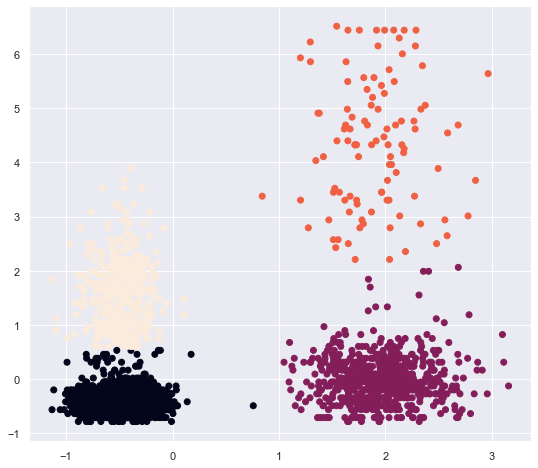

In [78]:


plt.scatter(finaldf['Distance_Feature'],finaldf['Speeding_Feature'],c=finaldf['Label'])

<AxesSubplot:xlabel='Distance_Feature', ylabel='Speeding_Feature'>

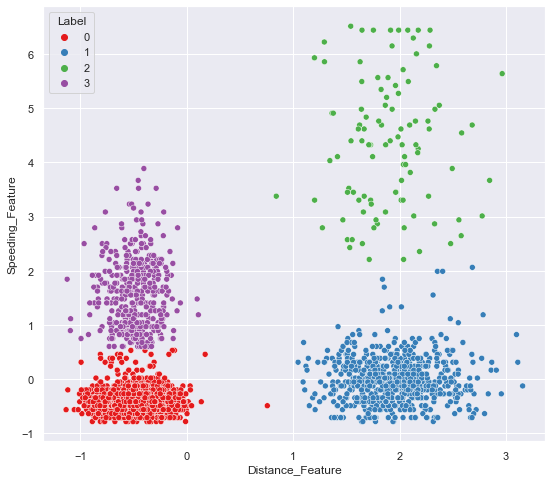

In [79]:
import seaborn as sns

sns.set(rc={'figure.figsize':(9,8)})

sns.scatterplot(x= finaldf['Distance_Feature'],y=finaldf['Speeding_Feature'],
               hue= finaldf['Label'],legend ='full',
               data= finaldf,palette = 'Set1')

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [64]:
data_scaled

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [65]:
data.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [80]:
f = finaldf['Label']
f.unique()

array([3, 0, 2, 1])

In [67]:
data_scaled1= np.array(finaldf)

In [68]:
Z= linkage(data_scaled1, method ='ward')

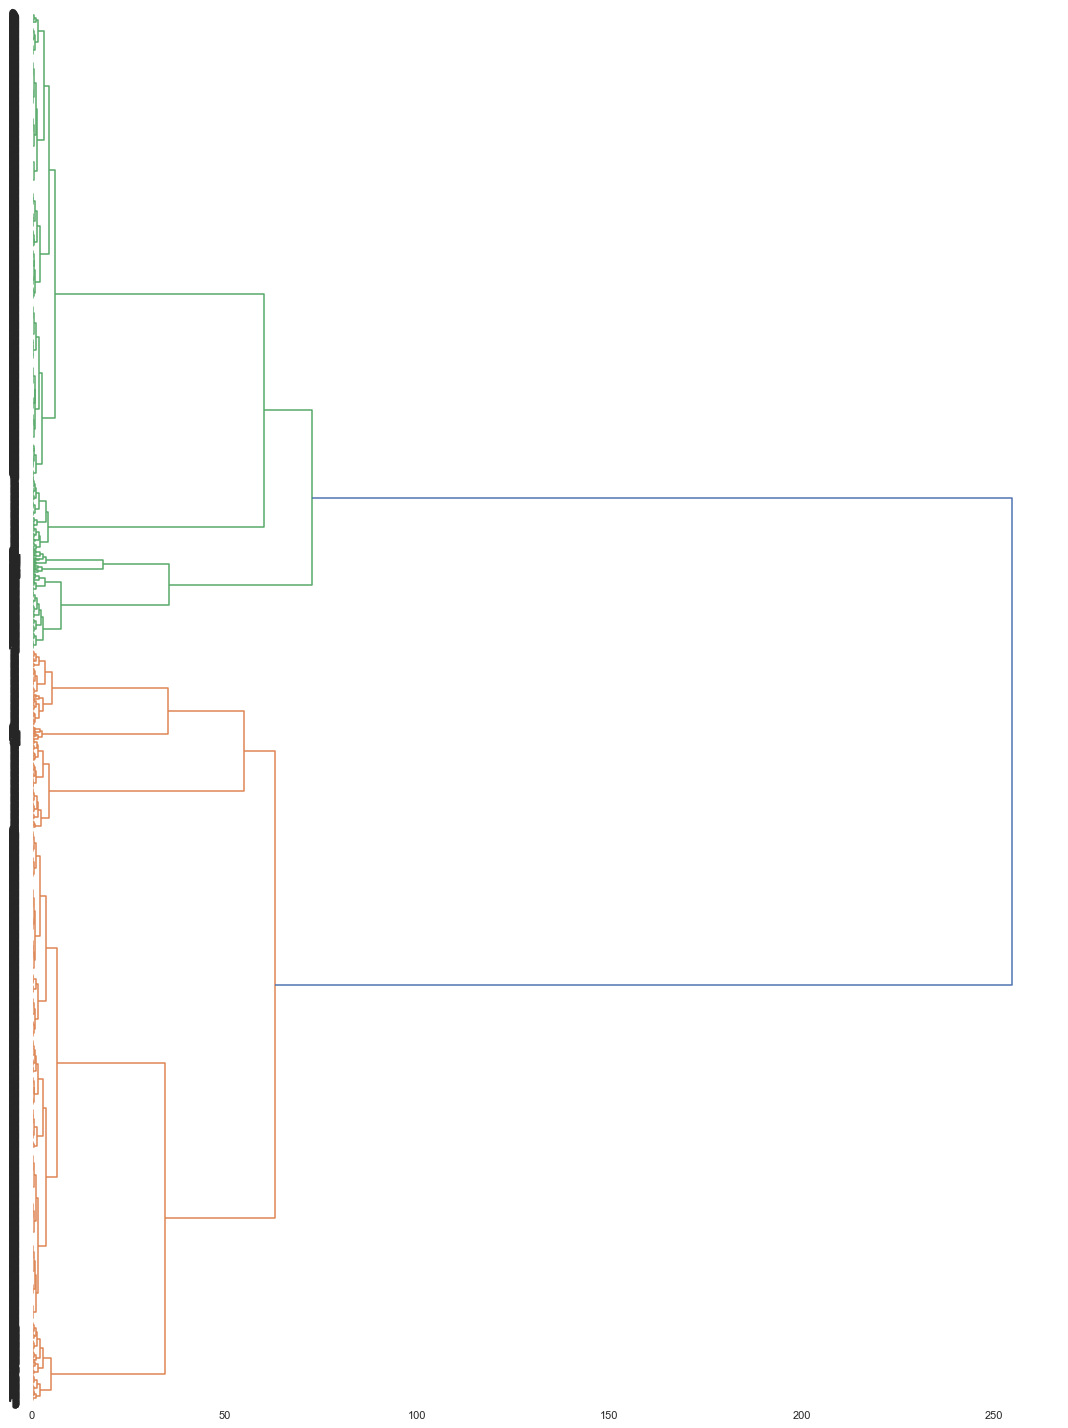

In [84]:
fig, ax = plt.subplots(figsize=(15,20))
ax = dendrogram(Z,orientation='right',
               labels= np.array(finaldf['Label']),
               leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()